In [ ]:
!pip install --upgrade pip -q
!pip install -q ktrain

     |████████████████████████████████| 1.5MB 7.6MB/s 
     |████████████████████████████████| 25.3 MB 1.5 MB/s 
     |████████████████████████████████| 6.8 MB 59.4 MB/s 
     |████████████████████████████████| 981 kB 64.8 MB/s 
     |████████████████████████████████| 263 kB 46.8 MB/s 
     |████████████████████████████████| 1.9 MB 59.4 MB/s 
     |████████████████████████████████| 1.2 MB 58.5 MB/s 
     |████████████████████████████████| 468 kB 43.9 MB/s 
     |████████████████████████████████| 3.3 MB 44.8 MB/s 
     |████████████████████████████████| 862 kB 47.3 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Generic
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings, gc
warnings.filterwarnings("ignore")


# Tensorflow
import tensorflow as tf

# ktrain
import ktrain
from ktrain import text

# sklearn
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
upload = files.upload()

Saving drugsComTest_raw.tsv to drugsComTest_raw.tsv


In [ ]:
from google.colab import files
upload = files.upload()

Saving drugsComTrain_raw.tsv to drugsComTrain_raw.tsv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 55 to 161046
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   320 non-null    int64  
 1   drugName     320 non-null    object 
 2   condition    320 non-null    object 
 3   review       320 non-null    object 
 4   rating       320 non-null    float64
 5   date         320 non-null    objec

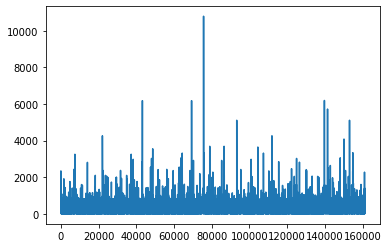

In [ ]:
df = pd.read_csv("drugsComTrain_raw.tsv", sep='\t')
df.info()
df['review'].str.len().plot()
maxer=df[df['review'].str.len()>1000]
maxer.info()

In [ ]:
df1 = pd.read_csv("drugsComTrain_raw.tsv", sep='\t')

df1.info()
p=df1[df1['review'].str.len()<=1000]
df1=p
drug1=pd.cut(df1.rating,bins=[0,8.00000,10],labels=[0,1],) 
df1.insert(3,'test',drug1) ##insert the review score
df1.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


,Unnamed: 0,drugName,condition,test,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,1,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,0,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,0,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,0,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10


In [ ]:
df2 = pd.read_csv("drugsComTest_raw.tsv", sep='\t')

df2.info()
p=df2[df2['review'].str.len()<=1000]
df2=p
drug1=pd.cut(df2.rating,bins=[0,8.00000,10],labels=[0,1],) 
df2.insert(3,'test',drug1) ##insert the review score
df2.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   53766 non-null  int64  
 1   drugName     53766 non-null  object 
 2   condition    53471 non-null  object 
 3   review       53766 non-null  object 
 4   rating       53766 non-null  float64
 5   date         53766 non-null  object 
 6   usefulCount  53766 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB


,Unnamed: 0,drugName,condition,test,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,1,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance",0,"""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,1,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,1,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35


In [ ]:
frames = [df1, df2]
df = pd.concat(frames)

In [ ]:
model_save_name = 'Electra.pt'
path = F"/content/gdrive/My Drive/{model_save_name}" 
reloaded_predictor = ktrain.load_predictor(path)

In [ ]:
y_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
# Data Split
target = ['test']
data = ['review']

X = df[data]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
# Transformer electra
model_ ="google/electra-base-discriminator"
t_mod = text.Transformer(model_, classes = [0,1], maxlen=512)


'''Converting split data to list [so it can processed]'''
#train
X_tr = X_train['review'].tolist()
y_tr = y_train['test'].tolist()

#test
X_ts = X_test['review'].tolist()
y_ts = y_test['test'].tolist()


# Pre-processing training & test data
train = t_mod.preprocess_train(X_tr,y_tr)
test = t_mod.preprocess_train(X_ts,y_ts)


preprocessing train...
language: en
train sequence lengths:
	mean : 84
	95percentile : 145
	99percentile : 153


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 84
	95percentile : 145
	99percentile : 153


Is Multi-Label? False


In [ ]:
X

,review
0,"""It has no side effect, I take it in combinati..."
1,"""My son is halfway through his fourth week of ..."
2,"""I used to take another oral contraceptive, wh..."
3,"""This is my first time using any form of birth..."
4,"""Suboxone has completely turned my life around..."
...,...
53761,"""I have taken Tamoxifen for 5 years. Side effe..."
53762,"""I&#039;ve been taking Lexapro (escitaploprgra..."
53763,"""I&#039;m married, 34 years old and I have no ..."
53764,"""I was prescribed Nucynta for severe neck/shou..."


In [ ]:
y

,test
0,1
1,0
2,0
3,0
4,1
...,...
53761,1
53762,1
53763,0
53764,0


In [ ]:
X_test["review"][32]

'"This stuff wasn&#039;t too bad!  I had a hard time with the first dose as I&#039;m not used to very sugary drinks and such.  Because of this, I did think it tasted quite gross.  It had a strange grape salty flavor but it was only 16 oz, so it wasn&#039;t too bad to get down.  I had absolutely no discomfort or nausea.  It worked very fast and I was completely clean for the colonoscopy - this was my first colonoscopy and after having read the awful reviews of the gallon jug prep, I went for this stuff."'

In [ ]:
reloaded_predictor.view_top_losses(n=342,preproc=t_mod)

AttributeError: ignored

In [ ]:
!pip3 install git+https://github.com/amaiya/eli5@tfkeras_0_10_1

  Cloning https://github.com/amaiya/eli5 (to revision tfkeras_0_10_1) to /tmp/pip-req-build-k8f2p9l7
  Running command git clone -q https://github.com/amaiya/eli5 /tmp/pip-req-build-k8f2p9l7
  Running command git checkout -b tfkeras_0_10_1 --track origin/tfkeras_0_10_1
  Switched to a new branch 'tfkeras_0_10_1'
  Branch 'tfkeras_0_10_1' set up to track remote branch 'tfkeras_0_10_1' from 'origin'.
  Created wheel for eli5: filename=eli5-0.10.1-py2.py3-none-any.whl size=106832 sha256=614f3aa502913d0ab3051fd84811297b5ab0fd504b6791939598234ab7fe82e5
  Stored in directory: /tmp/pip-ephem-wheel-cache-q02egks8/wheels/f8/8c/47/b4cafd3c9519194a489dd614ead1485899d2b34c5adc4198ff
Successfully built eli5


In [ ]:
a=X_test
b=y_test

In [ ]:
a['review'][32]

'"This stuff wasn&#039;t too bad!  I had a hard time with the first dose as I&#039;m not used to very sugary drinks and such.  Because of this, I did think it tasted quite gross.  It had a strange grape salty flavor but it was only 16 oz, so it wasn&#039;t too bad to get down.  I had absolutely no discomfort or nausea.  It worked very fast and I was completely clean for the colonoscopy - this was my first colonoscopy and after having read the awful reviews of the gallon jug prep, I went for this stuff."'

In [ ]:
reloaded_predictor.explain(a['review'][32])

In [ ]:
[b['test'][32]]

[0]

In [ ]:
reloaded_predictor.explain(a['review'][24])

In [ ]:
[b['test'][32]]

[0]

In [ ]:
reloaded_predictor.explain(a['review'][3])

In [ ]:
[b['test'][3]]

[1]

In [ ]:
a

,review
139222,"""Suffer from SAD and PTSD tried Zoloft but had..."
144222,"""I love Allegra for my allergies because it do..."
158984,"""They have stopped making urised. Prosed was s..."
30178,"""My doctor prescribed this medication to me af..."
84365,"""I have diabetes type 2. I started using Victo..."
...,...
37575,"""Im currently taking this and the first two en..."
10580,"""I have been on Implanon for almost two years ..."
135569,"""This was prescribed to me a couple of days ag..."
35862,"""I&#039;ve taken several antidepressants, and ..."


In [ ]:
b.head(50)

,test
139222,1
144222,1
158984,1
30178,1
84365,1
91534,0
131831,1
57086,0
58202,1
28893,1


In [ ]:
reloaded_predictor.explain(a['review'][139222])

In [ ]:
b["test"][139222]

1

In [ ]:
reloaded_predictor.explain(a['review'][144222])


In [ ]:
b['test'][144222]

1

In [ ]:
reloaded_predictor.explain(a['review'][158984]) ****************sig

In [ ]:
b["test"][158984]

1

In [ ]:
reloaded_predictor.explain(a['review'][30178])

In [ ]:
b["test"][30178]

1

In [ ]:

reloaded_predictor.explain(a['review'][84365])

In [ ]:
b["test"][84365]

1

In [ ]:

reloaded_predictor.explain(a['review'][36871])

In [ ]:
b["test"][36871]

0

In [ ]:
reloaded_predictor.explain(a['review'][63234])

In [ ]:
b["test"][63234]


1

In [ ]:

reloaded_predictor.explain(a['review'][1827])

In [ ]:
b["test"][63234]


1